# MeanShift Clustering on Candy Dataset
This notebook demonstrates how to use MeanShift clustering to group candies based on their features. We use the `candy.csv` dataset, apply MeanShift from scikit-learn, and visualize the resulting clusters and centers.

In [1]:
import pandas as pd

from sklearn.cluster import MeanShift

**Importing Required Libraries**
We import `pandas` for data manipulation and `MeanShift` from scikit-learn to perform clustering.

In [2]:
dataset = pd.read_csv('../data/candy.csv')
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


**Loading and Previewing the Dataset**
We load the candy dataset from a CSV file and display the first rows to understand its structure and contents.

In [3]:
X = dataset.drop(columns=['competitorname'])

**Selecting Features for Clustering**
We remove the 'competitorname' column from the dataset to use only numerical features for clustering.

In [5]:
meanshift = MeanShift()
meanshift.fit(X)

,bandwidth,None
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


**Fitting the MeanShift Model**
We fit the MeanShift algorithm to our data. MeanShift automatically estimates the number of clusters based on the data distribution.

In [7]:
max(meanshift.labels_)

np.int64(2)

**Checking the Number of Clusters Found**
We use the labels generated by MeanShift to determine the number of clusters identified in the dataset.

In [8]:
meanshift.cluster_centers_

array([[2.25000000e-01, 5.75000000e-01, 1.00000000e-01, 2.50000000e-02,
        5.00000000e-02, 2.50000000e-02, 3.00000000e-01, 1.00000000e-01,
        5.50000000e-01, 4.57599993e-01, 3.67824996e-01, 4.10442122e+01],
       [4.68750000e-01, 5.00000000e-01, 1.25000000e-01, 1.56250000e-01,
        9.37500000e-02, 6.25000000e-02, 1.25000000e-01, 3.12500000e-01,
        5.31250000e-01, 4.57281243e-01, 4.67874998e-01, 5.21138597e+01],
       [8.26086957e-01, 1.73913043e-01, 3.04347826e-01, 3.04347826e-01,
        1.73913043e-01, 1.73913043e-01, 0.00000000e+00, 5.21739130e-01,
        4.34782609e-01, 5.81391293e-01, 6.38086963e-01, 6.47120799e+01]])

**Accessing Cluster Centers**
We retrieve the coordinates of the cluster centers found by MeanShift. These centers represent the most dense regions in the feature space.

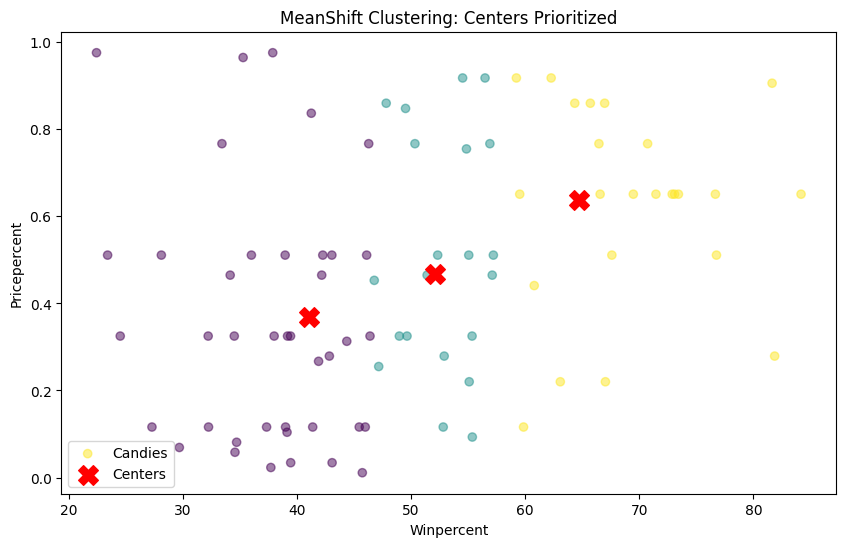

In [12]:
import matplotlib.pyplot as plt

centers = meanshift.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(X['winpercent'], X['pricepercent'], c=meanshift.labels_, cmap='viridis', alpha=0.5, label='Candies')
plt.scatter(centers[:, X.columns.get_loc('winpercent')], centers[:, X.columns.get_loc('pricepercent')],
            c='red', s=200, marker='X', label='Centers')
plt.xlabel('Winpercent')
plt.ylabel('Pricepercent')
plt.title('MeanShift Clustering: Centers Prioritized')
plt.legend()
plt.show()

**Visualizing the Clusters and Centers**
We create a scatter plot of candies using win percent and price percent as axes, coloring each point by its assigned cluster. The cluster centers are highlighted in red. This helps us visually interpret the clustering results.

In [20]:
dataset['meanshift'] = meanshift.labels_
dataset.drop('cluster', axis=1)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


**Assigning Cluster Labels to the Dataset**
We add the predicted cluster label as a new column in the dataset and display the updated DataFrame to see the group assignments.